<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/table_detector_line_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!ls

bill_table.jpg	sample_data


In [ ]:
file = r'bill_table.jpg'
im1 = cv2.imread(file, 0)
im = cv2.imread(file)

In [ ]:
ret,thresh_value = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

In [ ]:
cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

([array([[[  7, 774]],
  
         [[  7, 778]],
  
         [[  8, 779]],
  
         [[  8, 785]],
  
         [[ 13, 785]],
  
         [[ 13, 783]],
  
         [[ 14, 782]],
  
         [[ 14, 781]],
  
         [[ 15, 780]],
  
         [[ 15, 775]],
  
         [[ 14, 774]]], dtype=int32), array([[[  8, 658]],
  
         [[  6, 660]],
  
         [[  6, 670]],
  
         [[  8, 670]],
  
         [[  9, 671]],
  
         [[ 14, 671]],
  
         [[ 15, 670]],
  
         [[ 15, 669]],
  
         [[ 16, 668]],
  
         [[ 16, 663]],
  
         [[ 14, 661]],
  
         [[ 14, 658]]], dtype=int32), array([[[  7, 545]],
  
         [[  7, 556]],
  
         [[  8, 556]],
  
         [[  9, 557]],
  
         [[ 14, 557]],
  
         [[ 16, 555]],
  
         [[ 16, 548]],
  
         [[ 15, 548]],
  
         [[ 14, 547]],
  
         [[ 14, 545]]], dtype=int32), array([[[ 10, 431]],
  
         [[  9, 432]],
  
         [[  9, 434]],
  
         [[  7, 436]],
  
        

In [ ]:
contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cordinates = []
# for cnt in contours:
#  x,y,w,h = cv2.boundingRect(cnt)
#  cordinates.append((x,y,w,h))
#  #bounding the images
#  if y< 50:
 
# #  cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),1)

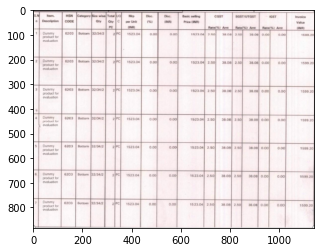

In [ ]:
plt.imshow(im)
# cv2.namedWindow(‘detecttable’, cv2.WINDOW_NORMAL)
# cv2.imwrite(‘detecttable.jpg’,im)

In [ ]:
!pip install opencv-python
!pip install pytesseract

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


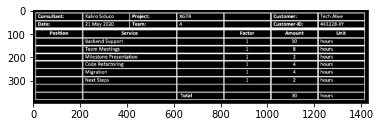

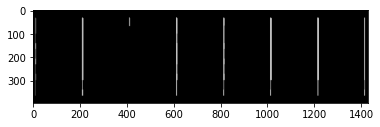

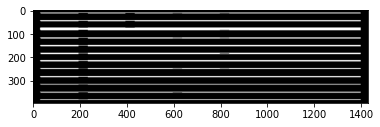

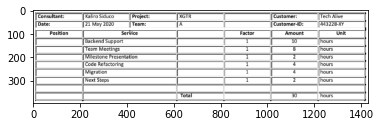

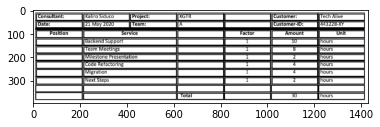

[[12, 350, 197, 29], [1219, 353, 194, 25], [1017, 353, 197, 25], [817, 353, 195, 25], [616, 353, 196, 25], [216, 353, 395, 25]]
[[[1221, 17, 192, 26], [1020, 17, 193, 26], [819, 17, 193, 26], [618, 17, 194, 26], [416, 17, 195, 26], [217, 17, 193, 26], [15, 17, 194, 26]], [[1221, 50, 192, 24], [1020, 50, 193, 24], [819, 50, 193, 24], [618, 50, 194, 24], [416, 50, 195, 24], [217, 50, 193, 24], [15, 50, 194, 24]], [[1221, 88, 192, 28], [1020, 88, 193, 28], [819, 88, 193, 28], [618, 88, 194, 28], [217, 88, 394, 28], [15, 88, 194, 28]], [[1221, 123, 192, 25], [1020, 123, 193, 25], [819, 123, 193, 25], [618, 123, 194, 25], [217, 123, 394, 25], [15, 123, 194, 25]], [[1221, 156, 192, 25], [1020, 156, 193, 25], [819, 156, 193, 25], [618, 156, 194, 25], [217, 156, 394, 25], [15, 156, 194, 25]], [[1221, 189, 192, 23], [1020, 189, 193, 23], [819, 189, 193, 23], [618, 189, 194, 23], [217, 189, 394, 23], [15, 189, 194, 23]], [[1221, 220, 192, 26], [1020, 220, 193, 26], [819, 220, 193, 26], [618, 220

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#read your file
file=r'bill3.jpg'
img = cv2.imread(file,0)
img.shape

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('bill_table_inverted.jpg',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

# countcol(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        
plotting = plt.imshow(image,cmap='gray')
plt.show()

#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0

#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
print(column)
print(row)

#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

center=np.array(center)
center.sort()
print(center)
#Regarding the distance to the columns center, the boxes are arranged in respective order

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)


#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
data.to_excel("output.xlsx")